In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')

# Data Loading

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# EDA

In [3]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


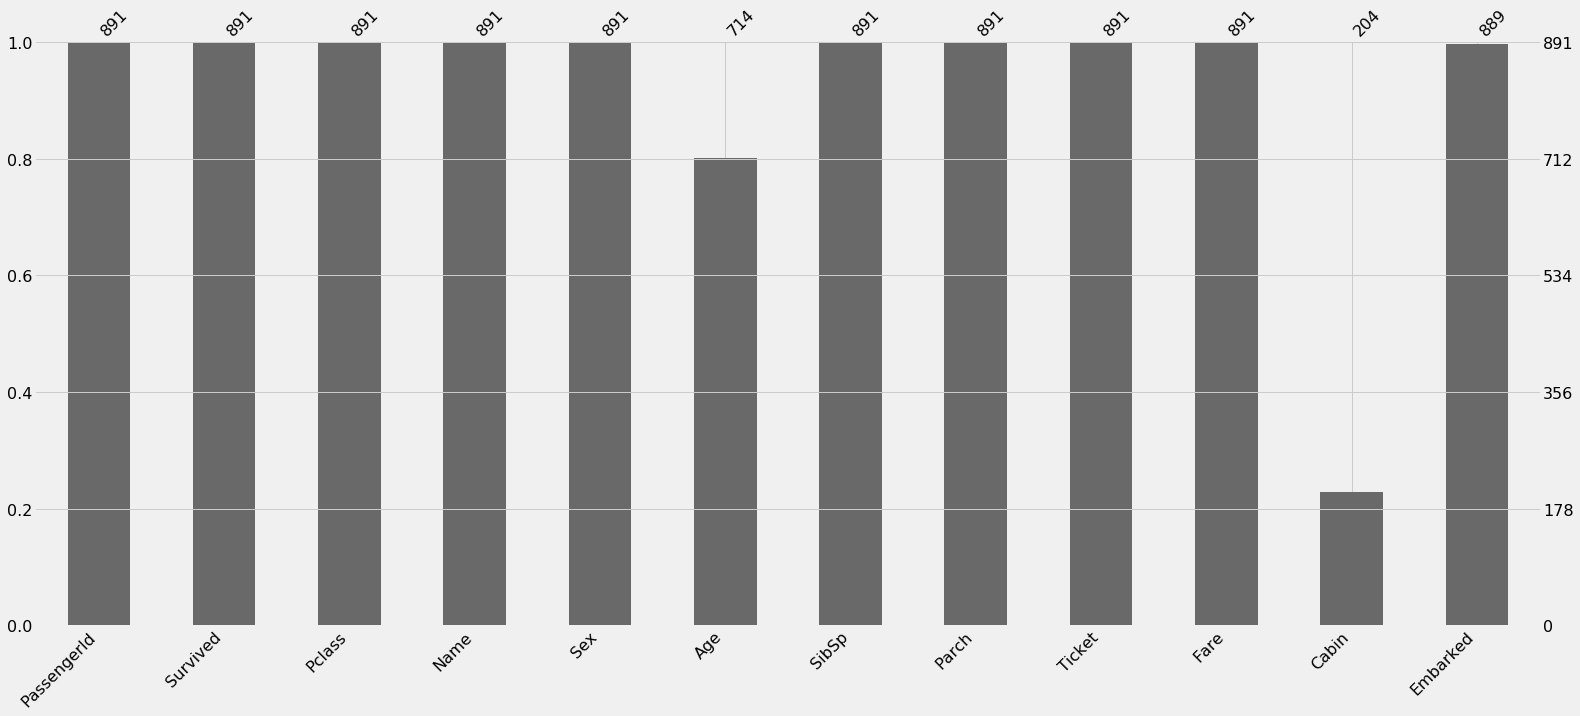

In [5]:
msno.bar(train)

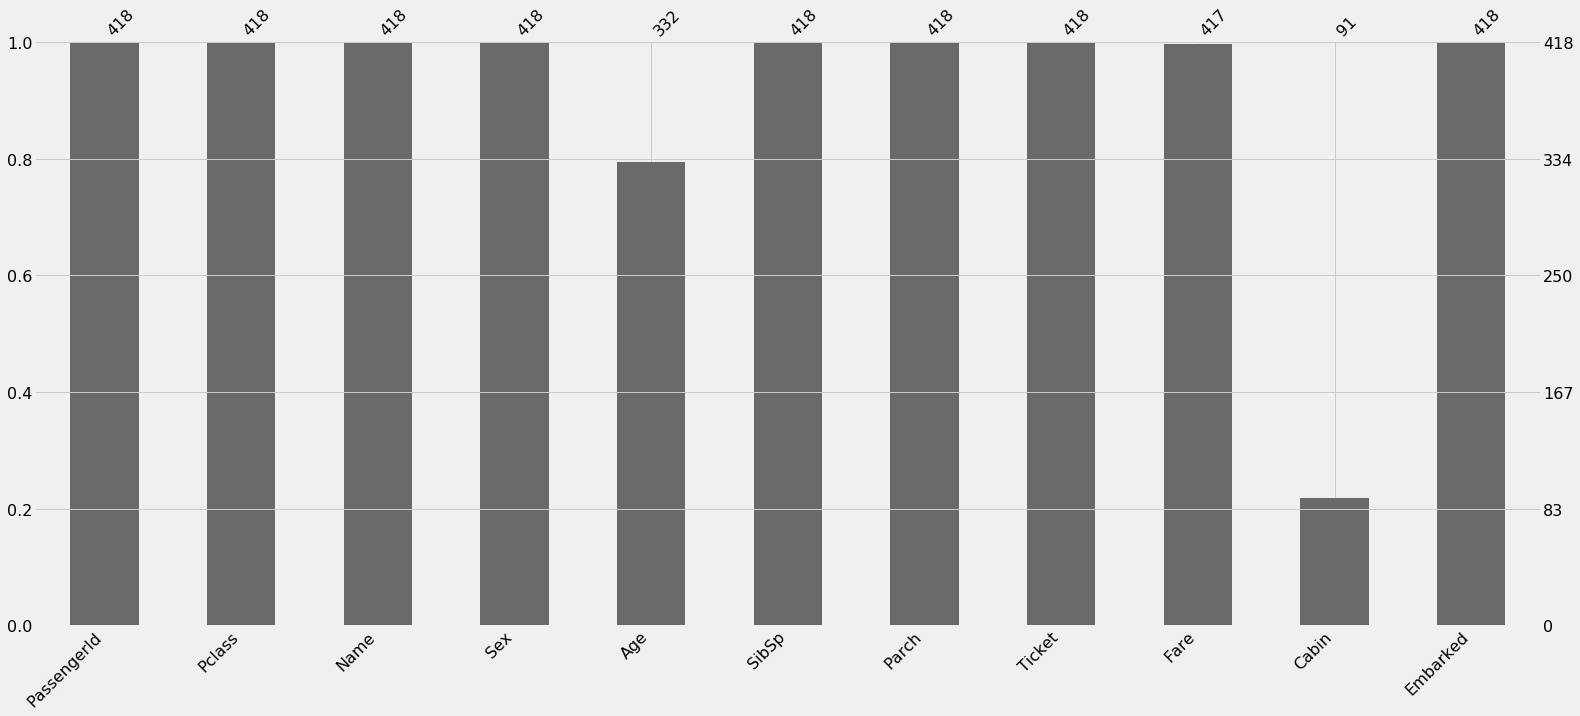

In [6]:
msno.bar(test)

### cabin 결측치 다수
### age 결측치 꽤 있음

In [7]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [8]:
def show_height(ax,fontsize=10):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=fontsize)

import os
import matplotlib.font_manager as fm
from matplotlib import rc

def set_font(font_file='malgun.ttf'): # 한글 출력
    font_dir = 'c:/Windows/Fonts/'
    font_name = fm.FontProperties(fname=os.path.join(font_dir, font_file)).get_name()
    rc('font', family=font_name)
set_font()

In [9]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


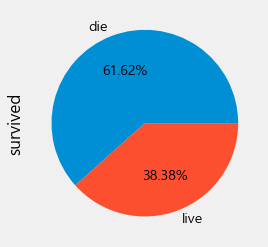

In [10]:
train['survived'].value_counts().plot(kind='pie',autopct = '%.2f%%',labels=['die','live'])

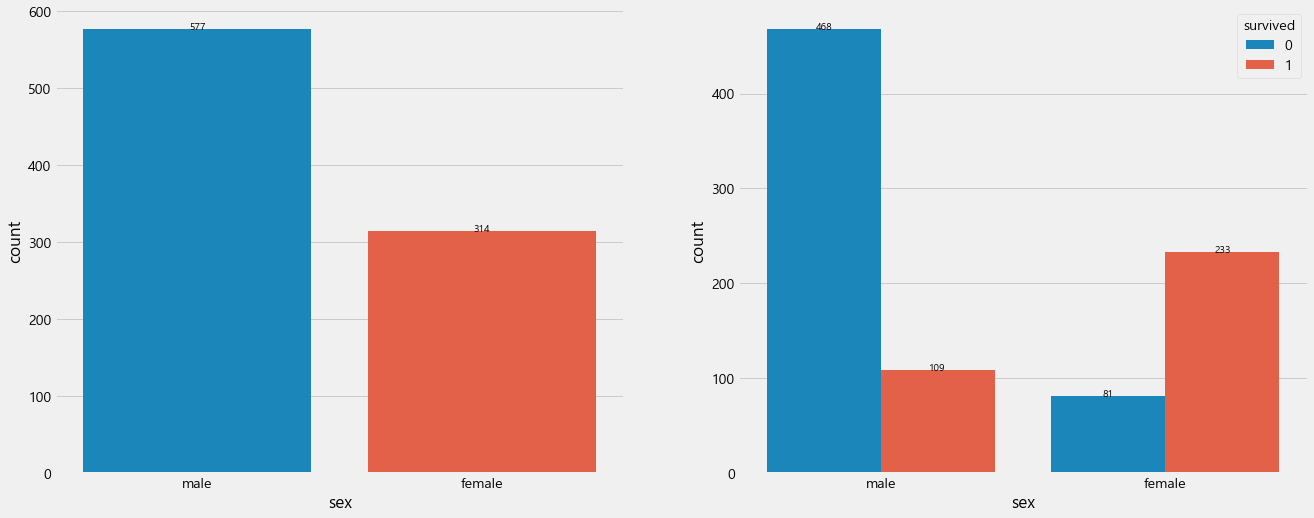

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1 = sns.countplot(train['sex'],ax=ax1)
ax2 = sns.countplot(train['sex'],hue=train['survived'],ax=ax2)
show_height(ax1)
show_height(ax2)

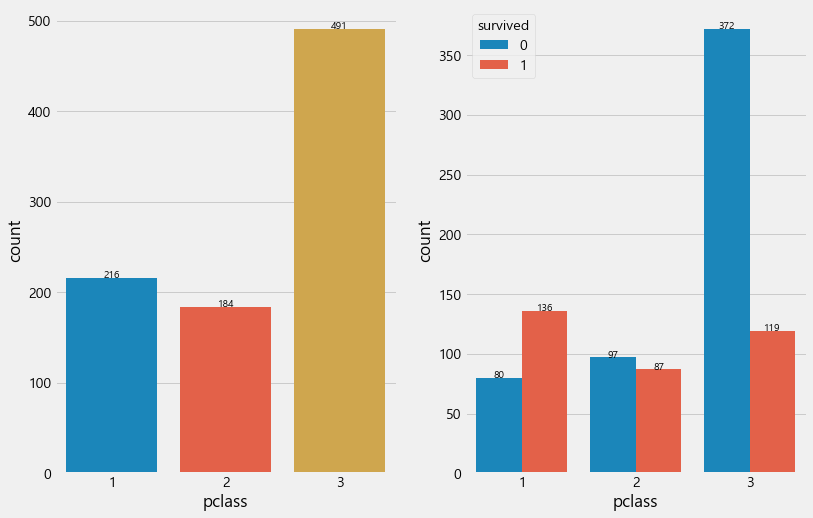

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
ax1 = sns.countplot(data=train,x='pclass',ax=ax1)
ax2 = sns.countplot(data=train,x = 'pclass',hue='survived',ax=ax2)
show_height(ax1);show_height(ax2)

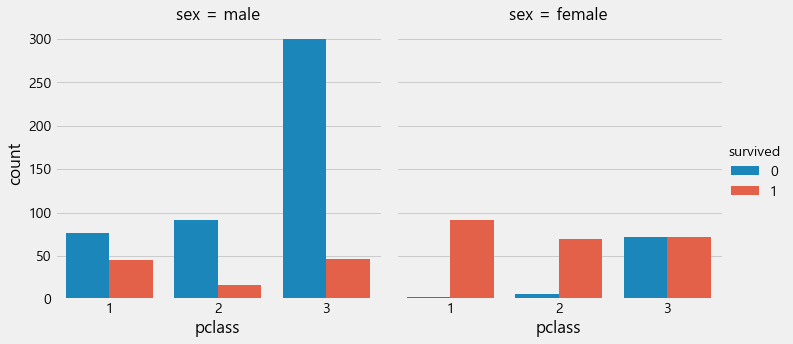

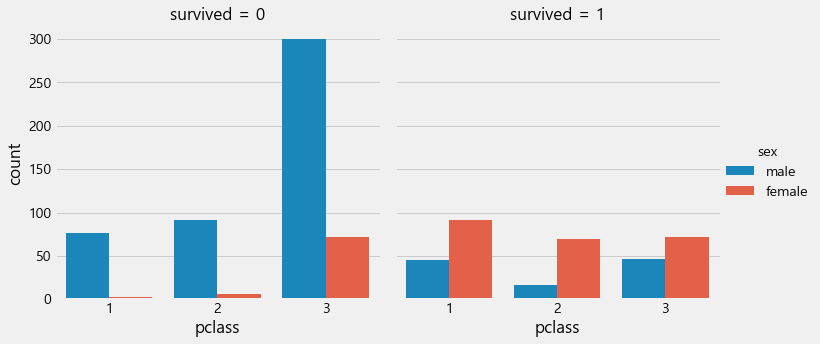

In [13]:
sns.catplot(x = 'pclass',kind='count',hue='survived',col='sex',data=train,ax=ax1)
sns.catplot(x = 'pclass',kind='count',hue='sex',col='survived',data=train,ax=ax2)

In [14]:
train['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
dataset = pd.concat([train,test]).reset_index(drop=True)
train_len = train.shape[0]
test_len = test.shape[0]

In [16]:
dataset.isnull().sum()

passengerid       0
survived        418
pclass            0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

In [17]:
dataset['embarked'].fillna(dataset['embarked'].mode()[0],inplace=True)

In [18]:
dataset['cabin'] = dataset['cabin'].apply(lambda x: None if type(x) != str else x[0])

In [19]:
dataset[['pclass','fare']].corr()

,pclass,fare
pclass,1.000000,-0.558629
fare,-0.558629,1.000000


In [20]:
dataset[['pclass','fare']].groupby('pclass').mean()

,fare
pclass,
1,87.508992
2,21.179196
3,13.302889


In [21]:
dataset[dataset['fare'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,None,S


In [22]:
dataset['fare'].fillna(dataset[['pclass','fare']].groupby('pclass').mean().iloc[2],inplace=True)

In [23]:
train = dataset.iloc[:train_len]
test = dataset.iloc[train_len:]

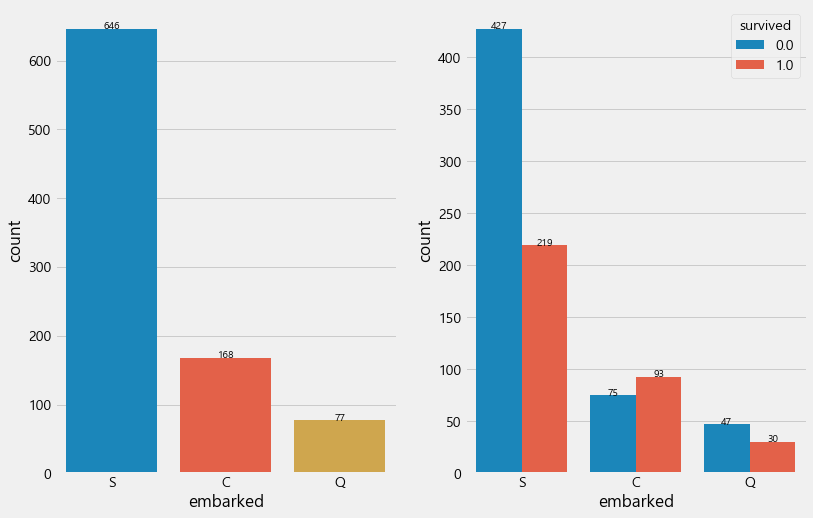

In [24]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
ax1=sns.countplot(train['embarked'],ax=ax1)
ax2 = sns.countplot(train['embarked'],hue=train['survived'],ax=ax2)
show_height(ax1);show_height(ax2)

In [25]:
dataset.drop('ticket',axis=1,inplace=True)

In [26]:
dataset['name'] = dataset['name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])

In [71]:
len(dataset['name'].unique())

18

In [33]:
dataset['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [41]:
# ~19 : 10s , ~29 : 20s ...60~ : old 
dataset['age'] = pd.cut(dataset['age'],[0,20,30,40,50,60,100],labels=['10s','20s','30s','40s','50s','old'],right=False)

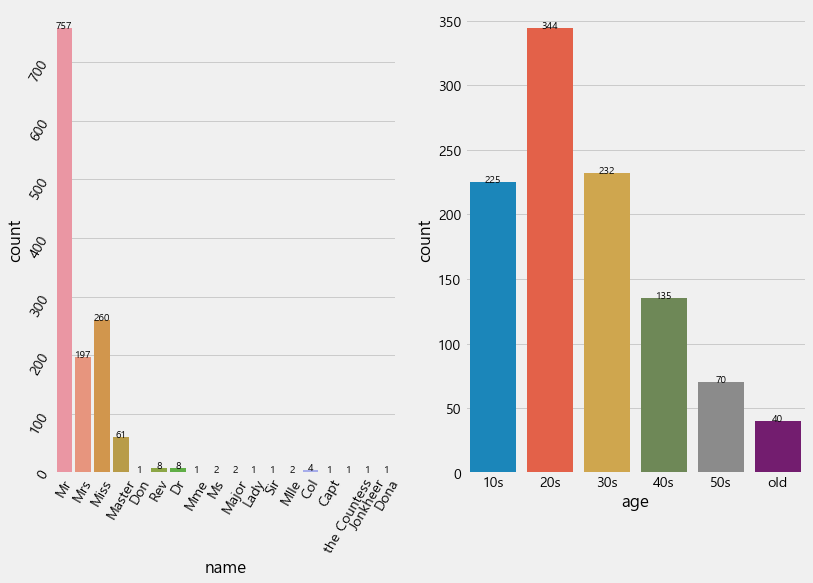

In [49]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
ax1 = sns.countplot(dataset['name'],ax=ax1)
ax1.tick_params(labelrotation=60)
ax2 = sns.countplot(dataset['age'],ax=ax2)
show_height(ax1);show_height(ax2)

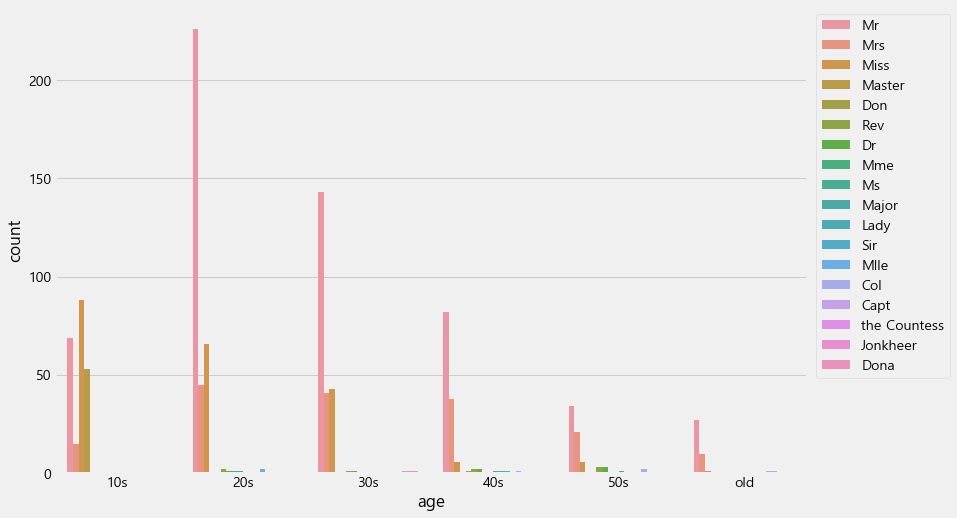

In [63]:
plt.figure(figsize=(12,8))
ax=sns.countplot(dataset['age'],hue=dataset['name'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

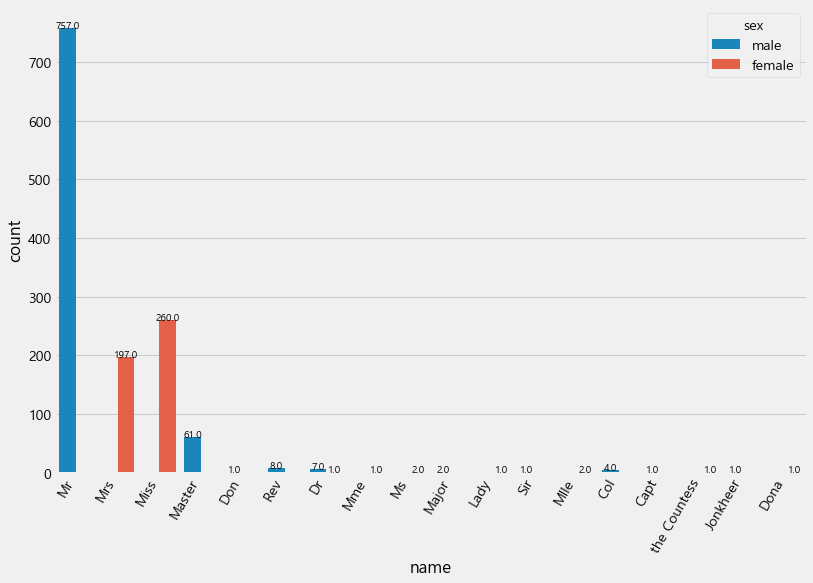

In [66]:
plt.figure(figsize=(12,8))
ax = sns.countplot(dataset['name'],hue=dataset['sex'])
plt.xticks(rotation=60,ha='right')
show_height(ax)